In [1]:
# importing necessary libraries 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# loading the data file 
data = pd.read_csv(r'C:\Users\pranav\Downloads\MachineLearningExamPaper1withdataset\Machine Learning Exam Paper 1\Datasets\bank.csv',header=0)

### Performing EDA

In [3]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [4]:
data.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


<AxesSubplot: >

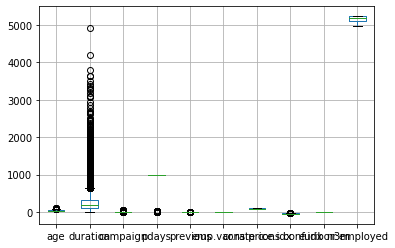

In [5]:
# using boxplot to see if theres any ouliers 
data.boxplot()

### Duration have outliers 

In [6]:
data.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

In [7]:
data.shape

(41188, 21)

In [8]:
data.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [9]:
# there are no missing values but there are unknown values so replacing them with nan values 
data=data.replace('unknown', np.nan)

In [10]:
data.isnull().sum()

age                  0
job                330
marital             80
education         1731
default           8597
housing            990
loan               990
contact              0
month                0
day_of_week          0
duration             0
campaign             0
pdays                0
previous             0
poutcome             0
emp.var.rate         0
cons.price.idx       0
cons.conf.idx        0
euribor3m            0
nr.employed          0
y                    0
dtype: int64

In [11]:
#imputing the mode values as it is categorical data
for value in ['job','marital','education','default','housing','loan']:
    data[value].fillna(data[value].mode()[0],inplace=True)

In [12]:
data.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [13]:
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

###  Using lable encoder to convert Object dtype in string

In [14]:
from sklearn import preprocessing

colname=['job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week','poutcome','y']

le=preprocessing.LabelEncoder()

for x in colname:
    data[x]=le.fit_transform(data[x])
    

In [15]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,3,1,0,0,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
1,57,7,1,3,0,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
2,37,7,1,3,0,1,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
3,40,0,1,1,0,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
4,56,7,1,3,0,0,1,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0


### making split by dependant and independant variables


In [16]:
x = data.values[:,:-1]
y = data.values[:,-1]
y = y.astype(int)

In [17]:
x.shape

(41188, 20)

In [18]:
y.shape

(41188,)

### Splitting the data for training and testing 

In [19]:
from sklearn.model_selection import train_test_split

# splitting the data into training and testing
x_train , x_test, y_train, y_test = train_test_split(x,y, test_size=0.2)

In [20]:
x_test.shape

(8238, 20)

In [21]:
x_train.shape

(32950, 20)

### Running the random forest model

In [22]:
from sklearn.ensemble import RandomForestClassifier

model_rf = RandomForestClassifier(n_estimators=300)

model_rf.fit(x_train,y_train)

y_pred = model_rf.predict(x_test)

print (y_pred)

[0 0 0 ... 0 0 0]


In [23]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

print("confusion matrix", confusion_matrix(y_test,y_pred))
print("accuracy score:", accuracy_score(y_test,y_pred))
print("classification report:", classification_report(y_test,y_pred))

confusion matrix [[7009  239]
 [ 497  493]]
accuracy score: 0.9106579266812334
classification report:               precision    recall  f1-score   support

           0       0.93      0.97      0.95      7248
           1       0.67      0.50      0.57       990

    accuracy                           0.91      8238
   macro avg       0.80      0.73      0.76      8238
weighted avg       0.90      0.91      0.90      8238



### As we can see the accuracy score is 91% which is good and we can do the feature selection further

In [24]:
# print(list(zip(data.columns[0:-1],model_rf.feature_importances_)))

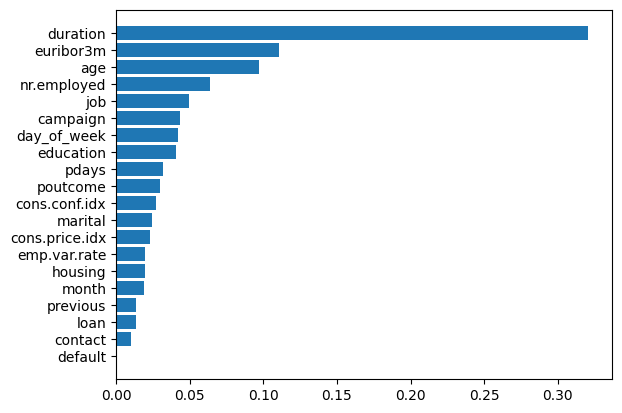

In [25]:
f_i = list(zip(data.columns[0:-1],model_rf.feature_importances_))
f_i.sort(key = lambda x : x[1])
plt.barh([x[0] for x in f_i],[x[1] for x in f_i])

plt.show()

### As the default variable has no importance in the dataset we can drop it 

In [26]:
# feature_importances = pd.DataFrame(model_rf.feature_importances_, index =data.columns[0:-1],  columns=['importance']).sort_values('importance', ascending=False)

In [27]:
# print(feature_importances)

In [28]:
data.drop(columns=['default'],axis=1,inplace=True)

In [29]:
data.head()

,age,job,marital,education,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,3,1,0,0,0,1,6,1,261,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
1,57,7,1,3,0,0,1,6,1,149,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
2,37,7,1,3,1,0,1,6,1,226,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
3,40,0,1,1,0,0,1,6,1,151,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
4,56,7,1,3,0,1,1,6,1,307,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0


### After dropping the default variable we are again splitting the data into X & Y 

In [30]:
x = data.values[:,:-1]
y = data.values[:,-1]
y = y.astype(int)

### Now scaling the data using Standard scaler so that the further predictions can be done 

In [31]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit_transform(x)


array([[ 1.53303429, -0.17929992, -0.27980323, ...,  0.88644656,
         0.71245988,  0.33167991],
       [ 1.62899323,  0.94757962, -0.27980323, ...,  0.88644656,
         0.71245988,  0.33167991],
       [-0.29018564,  0.94757962, -0.27980323, ...,  0.88644656,
         0.71245988,  0.33167991],
       ...,
       [ 1.53303429,  0.38413985, -0.27980323, ..., -2.22495344,
        -1.49518647, -2.8156966 ],
       [ 0.38152696,  1.5110194 , -0.27980323, ..., -2.22495344,
        -1.49518647, -2.8156966 ],
       [ 3.26029527,  0.38413985, -0.27980323, ..., -2.22495344,
        -1.49518647, -2.8156966 ]])

In [32]:
print(x)

[[ 5.6000e+01  3.0000e+00  1.0000e+00 ... -3.6400e+01  4.8570e+00
   5.1910e+03]
 [ 5.7000e+01  7.0000e+00  1.0000e+00 ... -3.6400e+01  4.8570e+00
   5.1910e+03]
 [ 3.7000e+01  7.0000e+00  1.0000e+00 ... -3.6400e+01  4.8570e+00
   5.1910e+03]
 ...
 [ 5.6000e+01  5.0000e+00  1.0000e+00 ... -5.0800e+01  1.0280e+00
   4.9636e+03]
 [ 4.4000e+01  9.0000e+00  1.0000e+00 ... -5.0800e+01  1.0280e+00
   4.9636e+03]
 [ 7.4000e+01  5.0000e+00  1.0000e+00 ... -5.0800e+01  1.0280e+00
   4.9636e+03]]


### Splitting the data into training and testing 

In [33]:
from sklearn.model_selection import train_test_split

# splitting the data into training and testing
x_train , x_test, y_train, y_test = train_test_split(x,y, test_size=0.2)

In [34]:
x_test

array([[ 3.2000e+01,  9.0000e+00,  2.0000e+00, ..., -3.6100e+01,
         4.9660e+00,  5.2281e+03],
       [ 2.6000e+01,  8.0000e+00,  2.0000e+00, ..., -5.0000e+01,
         1.8110e+00,  5.0991e+03],
       [ 4.6000e+01,  7.0000e+00,  1.0000e+00, ..., -3.6400e+01,
         4.8570e+00,  5.1910e+03],
       ...,
       [ 2.9000e+01,  6.0000e+00,  2.0000e+00, ..., -4.2000e+01,
         4.0210e+00,  5.1958e+03],
       [ 2.7000e+01,  9.0000e+00,  2.0000e+00, ..., -4.6200e+01,
         1.2910e+00,  5.0991e+03],
       [ 3.4000e+01,  6.0000e+00,  2.0000e+00, ..., -4.7100e+01,
         1.4050e+00,  5.0991e+03]])

### applying adaboost, KNN, SVC, Logistic Regression

In [35]:
# predicting using the AdaBoost_Classifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

model_AdaBoost=AdaBoostClassifier(base_estimator=DecisionTreeClassifier(),
                                  n_estimators=10)
#fit the model on the data and predict the values
model_AdaBoost.fit(x_train,y_train)
y_pred_adb=model_AdaBoost.predict(x_test)


In [36]:
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report
#confusion matrix
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[6653  646]
 [ 853   86]]
0.8180383588249576
              precision    recall  f1-score   support

           0       0.89      0.91      0.90      7299
           1       0.12      0.09      0.10       939

    accuracy                           0.82      8238
   macro avg       0.50      0.50      0.50      8238
weighted avg       0.80      0.82      0.81      8238



In [37]:
# predicting using the Kneighbors classifier
from sklearn.neighbors import KNeighborsClassifier
model_KNN=KNeighborsClassifier(n_neighbors=int(np.sqrt(len(x_train))),
                               metric='minkowski')

# euclidean, manhattan, minkowski
# fit the model on the data and predict the values
model_KNN.fit(x_train,y_train)

y_pred_KNN=model_KNN.predict(x_test)

In [38]:
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report
#confusion matrix
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[6653  646]
 [ 853   86]]
0.8180383588249576
              precision    recall  f1-score   support

           0       0.89      0.91      0.90      7299
           1       0.12      0.09      0.10       939

    accuracy                           0.82      8238
   macro avg       0.50      0.50      0.50      8238
weighted avg       0.80      0.82      0.81      8238



In [39]:
#predicting using svc 
from sklearn.svm import SVC

svc_model=SVC(kernel='rbf',C=1,gamma=0.1)

svc_model.fit(x_train, y_train)
Y_pred_svc=svc_model.predict(x_test)

In [40]:
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report
#confusion matrix
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[6653  646]
 [ 853   86]]
0.8180383588249576
              precision    recall  f1-score   support

           0       0.89      0.91      0.90      7299
           1       0.12      0.09      0.10       939

    accuracy                           0.82      8238
   macro avg       0.50      0.50      0.50      8238
weighted avg       0.80      0.82      0.81      8238



In [41]:
from sklearn.linear_model import LogisticRegression
log_model= LogisticRegression(solver='lbfgs',max_iter=1000)

log_model.fit(x_train, y_train)
 
y_pred_log= log_model.predict(x_test)

C:\Users\pranav\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [42]:
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report
#confusion matrix
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[6653  646]
 [ 853   86]]
0.8180383588249576
              precision    recall  f1-score   support

           0       0.89      0.91      0.90      7299
           1       0.12      0.09      0.10       939

    accuracy                           0.82      8238
   macro avg       0.50      0.50      0.50      8238
weighted avg       0.80      0.82      0.81      8238



### As we can see from the accuracy scores from all 4 models they have exact same accuracy.